In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('dataset/video_games_2016.csv')

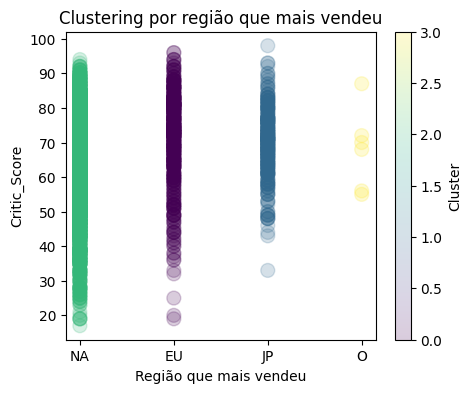

In [19]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder
from kmodes.kmodes import KModes 

df.dropna(inplace=True)

Q1 = df['Global_Sales'].quantile(0.05)
Q3 = df['Global_Sales'].quantile(0.95)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

column_to_number = {
    'NA_Sales': "NA",
    'EU_Sales': "EU",
    'JP_Sales': "JP",
    'Other_Sales': "O" 
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)
# print( df.head() )

X = df[[ "Greatest" ]]

df.dropna(inplace=True)

cluster_k = KModes( n_clusters=4, random_state=42 )
# cluster_k = KMeans( n_clusters=4, random_state=42 )

df['Cluster'] = cluster_k.fit_predict(X)

plt.figure(figsize=(5, 4))
plt.scatter( df['Greatest'], df['Critic_Score'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.2 )

plt.xlabel('Região que mais vendeu')
plt.ylabel('Critic_Score')

plt.colorbar(label='Cluster')
plt.title('Clustering por região que mais vendeu')

plt.show()

In [ ]:
# Checar correlações interessantes 
# Sample data

# Calculate the IQR for Column1
Q1 = df['Global_Sales'].quantile(0.0)
Q3 = df['Global_Sales'].quantile(0.95)

# Filter out the outliers from Global_Sales
df_fi = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

plt.scatter(
    df_fi['User_Score'],
    df_fi['']
)

# Add labels and title
plt.xlabel('Nota Usuários')
plt.ylabel('Vendas totais')
plt.title('A')

# Show the plot
plt.show()

In [ ]:
df["Publisher"] = df["Publisher"].astype('category').cat.codes
df["Platform"] = df["Platform"].astype('category').cat.codes
df["Genre"] = df["Genre"].astype('category').cat.codes
df["Developer"] = df["Developer"].astype('category').cat.codes
df["Greatest"] = df["Greatest"].astype('category').cat.codes

df["Critic_Score"] = df["Critic_Score"].fillna(0)
df["JP_Sales"] = df["JP_Sales"].fillna(0)

# Arvore baseada em
X = np.array(df[[
    "Genre",
    "Platform",
    "Developer",
    "Publisher"
]])

# Saída : NA | EU | JP | O
y = np.array(df['Greatest'])


In [11]:
from sklearn.model_selection import train_test_split

# Dividindo os conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn import tree

modeloarvoredecisao = tree.DecisionTreeClassifier(criterion='entropy')     

In [13]:
modeloarvoredecisao.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [14]:
modeloarvoredecisao.score(X_treinamento, y_treinamento)

0.9778921865536039

In [15]:

from sklearn import metrics
y_predicao = modeloarvoredecisao.predict(X_teste)

print("Acurácia:",metrics.accuracy_score(y_teste, y_predicao))
print("Precisão:",metrics.precision_score(y_teste, y_predicao, average=None))
print("Recall:",metrics.recall_score(y_teste, y_predicao, average=None))
print("F1-score:",metrics.f1_score(y_teste, y_predicao, average=None))

Acurácia: 0.7598870056497176
Precisão: [0.57327586 0.38461538 0.84805318 0.        ]
Recall: [0.58333333 0.40983607 0.84324835 0.        ]
F1-score: [0.57826087 0.3968254  0.84564394 0.        ]
